<a href="https://colab.research.google.com/github/Soohyun2478/Soohyun2478/blob/main/2022_%EC%84%9C%EC%9A%B8%EC%97%AC%EB%8C%80_%ED%99%A9%EC%9A%94%ED%95%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part I. Colab 기본 설정**

In [ ]:
# Step 1. 라이브러리 업그레이드
!pip install matplotlib -U 
!pip install seaborn -U
!pip install pandas -U
!pip install scikit-learn -U

# Step 2. 한글 설치 및 사용 설정
!apt-get -qq install -y fonts-nanum
!fc-cache -fv  
!rm ~/.cache/matplotlib -rf

# Step 3. 셀 실행 후 런타임 재시작

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 900 kB 42.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig:

In [ ]:
# Step 4. seaborn 환경 설정
import seaborn as sns

sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_context("talk")

# Step 5. 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

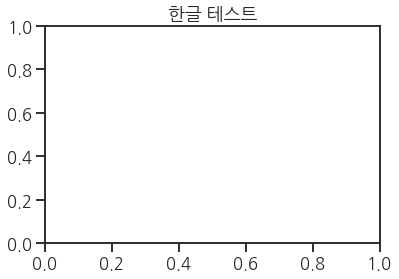

In [ ]:
# 한글 설정 확인
%matplotlib inline

plt.title("한글 테스트")
plt.show()

# **Part III. Head First ML**

## **1. 기본 라이브러리 불러오기**

In [ ]:
%matplotlib inline

import numpy as np              # 행렬 처리, 수치해석 라이브러리
import pandas as pd             # 데이터 처리 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns           # 시각화 라이브러리

np.random.seed(2022)            # 랜덤 seed

## **2. 실습용 데이터 다운로드**

In [ ]:
from urllib import request

url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
savename_red = "red.csv"
savename_white = "white.csv"

request.urlretrieve(url_red, savename_red)
request.urlretrieve(url_white, savename_white)

('white.csv', <http.client.HTTPMessage at 0x7fa6a6f107d0>)

In [ ]:
# 파일을 DataFrame 형식으로 열기

df = pd.read_csv("red.csv", delimiter=";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 데이터 행과 열 확인
df.shape

(1599, 12)

In [ ]:
# 데이터 수 및 종류 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* **Input variables (based on physicochemical tests):**  
   1 - **`fixed acidity`** : primary fixed acids found in wine are tartaric, succinic, citric, and malic : the gaseous acids present in wine.  
   2 - **`volatile acidity`** : the gaseous acids present in wine.  
   3 - **`citric acid`** : the weak organic acid found in citrus fruits naturally.  
   4 - **`residual sugar`** : amount of sugar left after fermentation.   
   5 - **`chlorides`** : amount of salt present in wine.  
   6 - **`free sulfur dioxide`** : used for prevention of wine by oxidation and microbial spoilage.  
   7 - **`total sulfur dioxide`** :  the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine.  
   8 - **`density`** : the mass per unit volume of wine.  
   9 - **`pH`** : used for checking acidity.  
   10 - **`sulphates`** : preserve freshness and protect wine from oxidation, and bacteria.  
   11 - **`alcohol`** : percent of alcohol present in wine.  

* **Output variable (based on sensory data):**  
   12 - **`quality`** (score between 0 and 10)

## **3. 데이터 검수**

### **3.1. 결측 데이터**

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **3.2. 중복 데이터**

In [ ]:
df.duplicated().sum()

240

### **3.3. 이상 데이터**

Text(0, 0.5, 'alcohol')

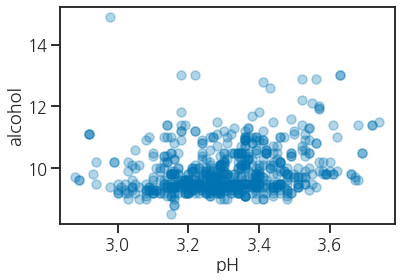

In [ ]:
df_5 = df.loc[df["quality"]==5]

fig, ax = plt.subplots()
ax.scatter(df_5["pH"], df_5["alcohol"], alpha=0.3)
ax.set_xlabel("pH")
ax.set_ylabel("alcohol")

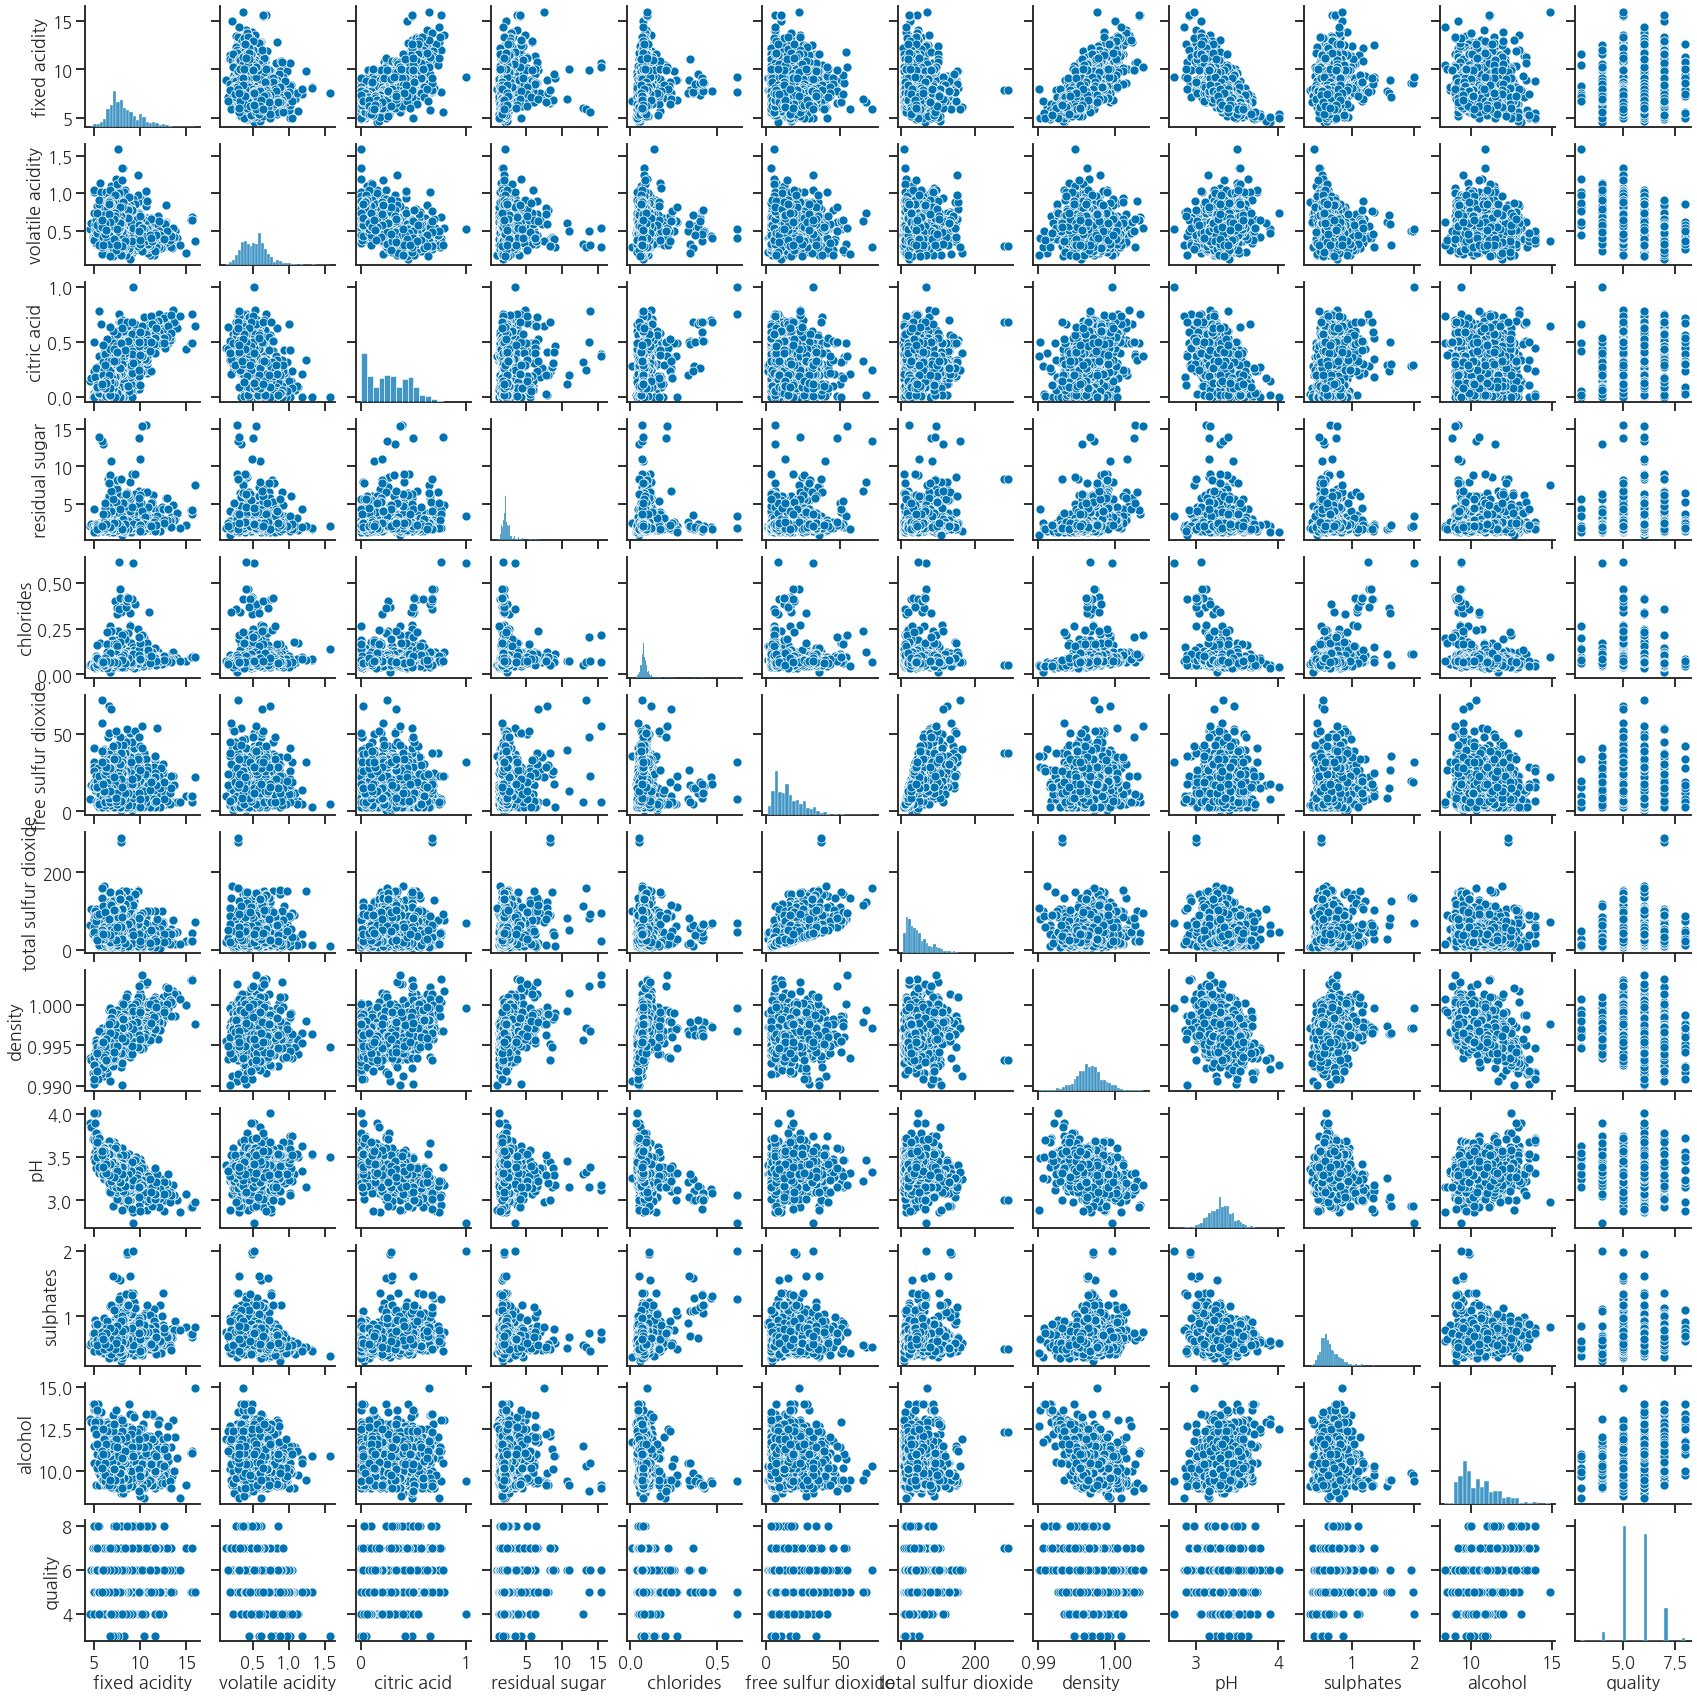

In [ ]:
sns.pairplot(df, height=2)

In [ ]:
df["quality"] = df["quality"].astype("str")

CPU times: user 36.1 s, sys: 978 ms, total: 37.1 s
Wall time: 36.7 s


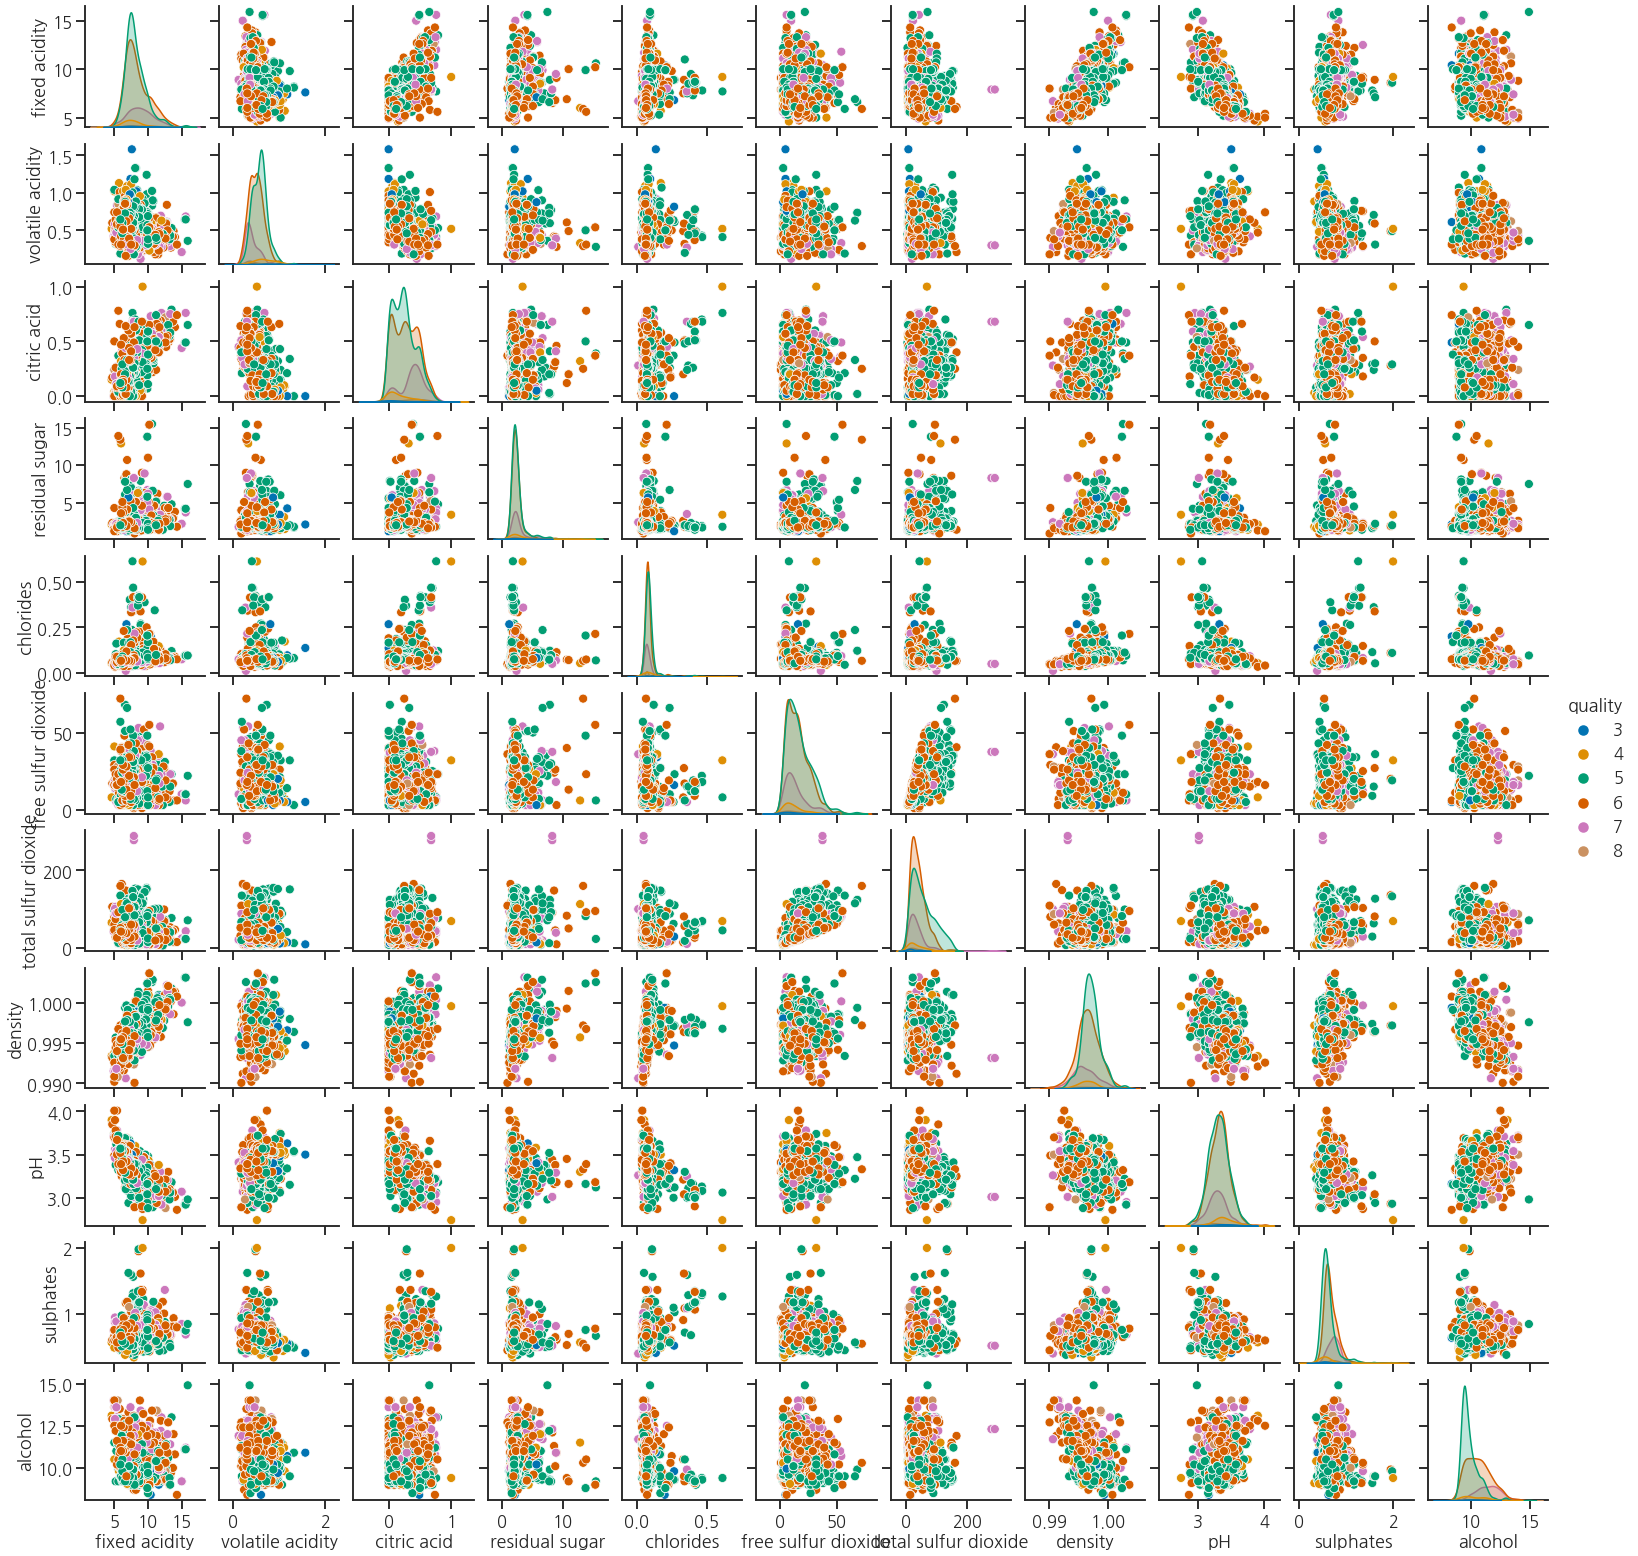

In [ ]:
%%time
sns.pairplot(df, height=2, hue="quality", hue_order=["3", "4", "5", "6", "7", "8"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

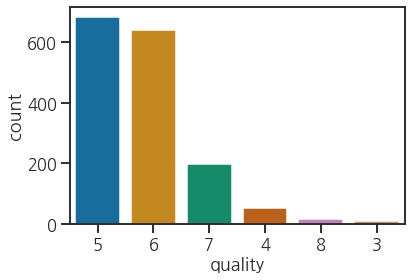

In [ ]:
# 데이터 빈도
sns.countplot(df["quality"])

In [ ]:
df["quality"].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

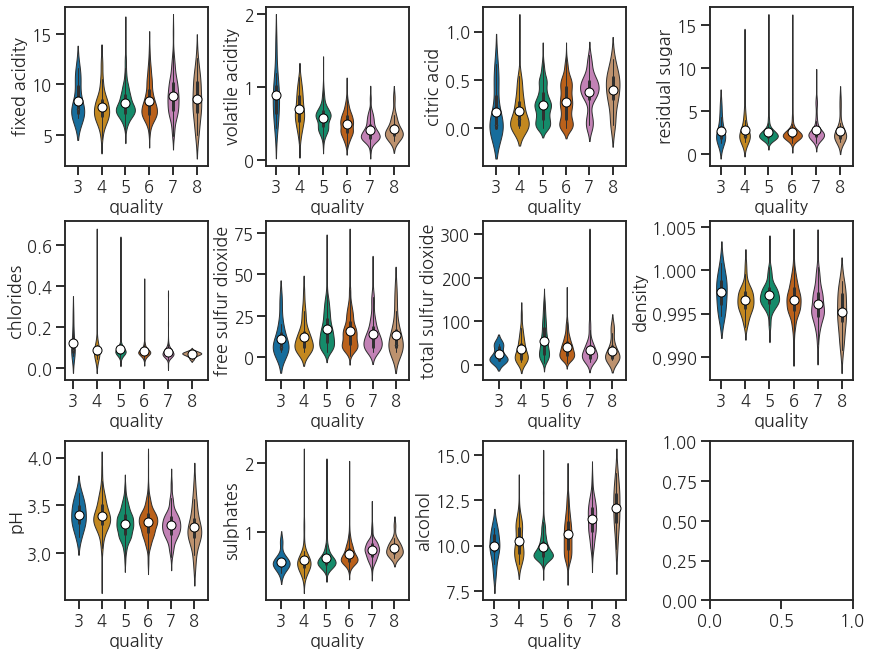

In [ ]:
# X vs y
df["quality"] = df["quality"].astype(int)
cols_x = df.select_dtypes(include="float").columns
dfg = df.groupby("quality").mean().reset_index()

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(12, 9), constrained_layout=True)
axs = axes.ravel()

for ax, col in zip(axs, cols_x):
    sns.violinplot(x="quality", y=col, data=df, ax=ax, linewidth=1)
    ax.scatter(dfg["quality"]-3, dfg[col], fc="w", ec="k", lw=1, zorder=10)

## **4. 데이터 분할**

### **4.1. trainset, testset 분할**
* validation 후 모델 업데이트 생략

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=2022)

In [ ]:
df_train.shape

(1119, 12)

In [ ]:
df_test.shape

(480, 12)

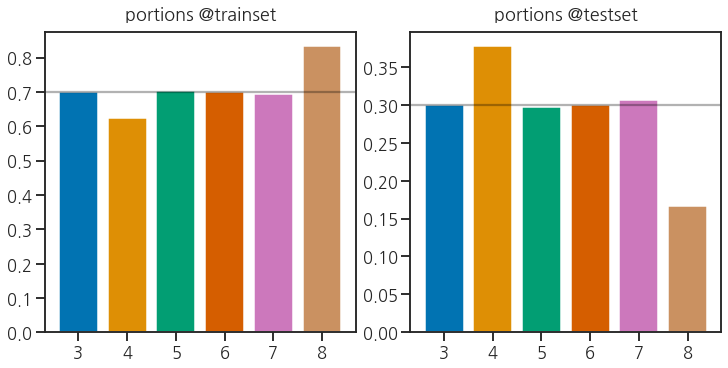

In [ ]:
y_train_portion = df_train["quality"].value_counts().sort_index()/df["quality"].value_counts().sort_index()
y_test_portion = df_test["quality"].value_counts().sort_index()/df["quality"].value_counts().sort_index()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)

y_portions = [y_train_portion, y_test_portion]
titles = ["portions @trainset", "portions @testset"]
for ax, yp, title in zip(axs, y_portions, titles):
    ax.bar(yp.index, yp.values, color=sns.color_palette("colorblind"))
    ax.set_title(title, pad=12)
    ax.set_xticks([3, 4, 5, 6, 7, 8])

axs[0].axhline(0.7, c="k", alpha=0.3)
axs[1].axhline(0.3, c="k", alpha=0.3)

* stratified sampling

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=2022, stratify=df["quality"])

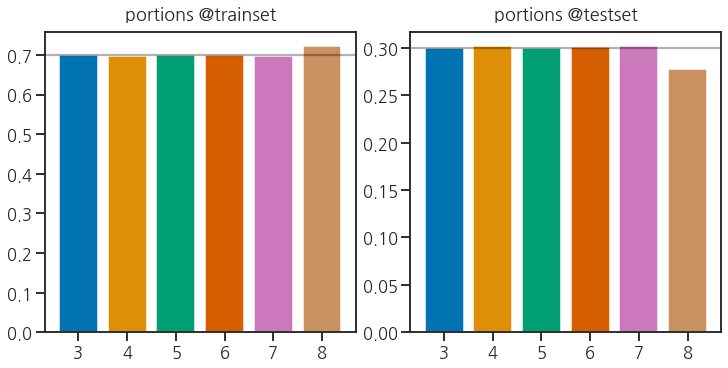

In [ ]:
y_train_portion = df_train["quality"].value_counts().sort_index()/df["quality"].value_counts().sort_index()
y_test_portion = df_test["quality"].value_counts().sort_index()/df["quality"].value_counts().sort_index()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)

y_portions = [y_train_portion, y_test_portion]
titles = ["portions @trainset", "portions @testset"]
for ax, yp, title in zip(axs, y_portions, titles):
    ax.bar(yp.index, yp.values, color=sns.color_palette("colorblind"))
    ax.set_title(title, pad=12)
    ax.set_xticks([3, 4, 5, 6, 7, 8])

axs[0].axhline(0.7, c="k", alpha=0.3)
axs[1].axhline(0.3, c="k", alpha=0.3)

### **4.2. X, y 분할**
* 목표 : Wine Quality 예측 모델


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()         # LabelEncoder 생성
le.fit(df_train["quality"]) # train data로 학습

LabelEncoder()

In [ ]:
le.classes_

array([3, 4, 5, 6, 7, 8])

In [ ]:
# y train, y test 생성
y_train = le.transform(df_train["quality"])
y_test = le.transform(df_test["quality"])

y_train[:3]

array([4, 3, 2])

In [ ]:
df_train["quality"][:3]

901     7
1270    6
578     5
Name: quality, dtype: int64

In [ ]:
# X train, X_test features
X_train = df_train.drop(["quality"], axis=1)
X_test = df_test.drop(["quality"], axis=1)

X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
901,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0
578,8.8,0.470,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8


## **5. 머신러닝 모델링**
* RandomForestClassifier 사용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 비어있는 랜덤포레스트 모델 만들기 
rf = RandomForestClassifier(n_estimators=30, random_state=2022)

# train dataset으로 학습
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=2022)

* **학습 성능 확인**

In [ ]:
from sklearn.metrics import precision_score, recall_score

# 학습용 X 데이터로 학습 현황 계산
y_train_pred = rf.predict(X_train)

# Precision 계산, 출력
pr_train = precision_score(y_train, y_train_pred, average=None)
print(f"Precision (train) = {pr_train}")

# Recall 계산, 출력
re_train = recall_score(y_train, y_train_pred, average=None)
print(f"Recall (train) = {re_train}")

Precision (train) = [1. 1. 1. 1. 1. 1.]
Recall (train) = [1. 1. 1. 1. 1. 1.]


In [ ]:
# 검증용 X 데이터로 학습 현황 계산
y_test_pred = rf.predict(X_test)

# Precision 계산, 출력
pr_test = precision_score(y_test, y_test_pred, average=None, zero_division=0)
print(f"Precision (test) = {pr_test}")

# Recall 계산, 출력
re_test = recall_score(y_test, y_test_pred, average=None, zero_division=0)
print(f"Recall (test) = {re_test}")

Precision (test) = [0.         0.         0.71129707 0.64039409 0.72222222 1.        ]
Recall (test) = [0.         0.         0.83333333 0.67708333 0.43333333 0.2       ]


In [ ]:
# precision, recall, f1-score 한번에 보기
# f1-score: precesion과 recall의 조화 평균
from sklearn.metrics import classification_report

target_names = [str(c) for c in le.classes_]  # 실제 이름
print(classification_report(y_test, y_test_pred, target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.71      0.83      0.77       204
           6       0.64      0.68      0.66       192
           7       0.72      0.43      0.54        60
           8       1.00      0.20      0.33         5

    accuracy                           0.68       480
   macro avg       0.51      0.36      0.38       480
weighted avg       0.66      0.68      0.66       480



In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm_columns = pd.MultiIndex.from_product([["prediction"], target_names])
cm_index = pd.MultiIndex.from_product([["true"], target_names])
df_cm = pd.DataFrame(data=cm, columns=cm_columns, index=cm_index)
df_cm

prediction                    
                3  4    5    6   7  8
true 3          0  0    2    1   0  0
     4          1  0    9    6   0  0
     5          0  0  170   34   0  0
     6          0  0   54  130   8  0
     7          0  0    4   30  26  0
     8          0  0    0    2   2  1

* **인자 중요도 (Permutation Importance)**  

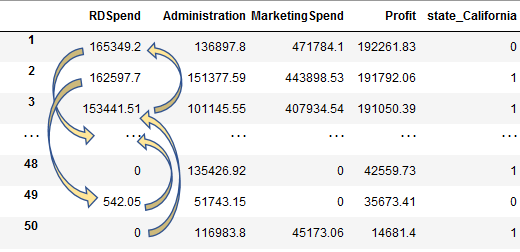

In [ ]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(rf, X_test, y_test, 
                            n_repeats=30, random_state=2022)

<BarContainer object of 11 artists>

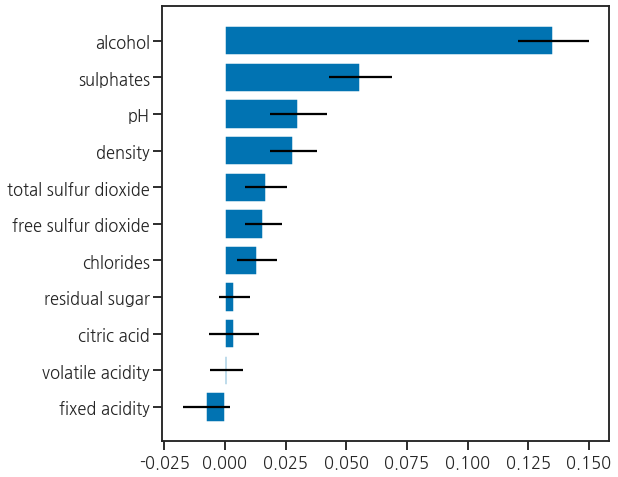

In [ ]:
plt.figure(figsize=(8,8))
argsort = np.argsort(pi.importances_mean)
plt.barh(X_train.columns, pi.importances_mean[argsort], xerr=pi.importances_std[argsort])